Import Libraries

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

**Training Values**: There are 38 features, including structual information as well as legal information. Each building is identified by a unique (random) building_id, which you can use as an index.
First of all, we download the data and we can see the amount and type of data we have

In [3]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_values.csv
df_train_values= pd.read_csv("train_values.csv", index_col = "building_id")
df_train_values.shape

--2022-12-13 09:48:15--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_values.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_values.csv [following]
--2022-12-13 09:48:15--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_values.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23442727 (22M) [text/plain]
Saving to: ‘train_values.csv’

train_values.csv    100%[===================>]  22.36M  --.-KB/s    in 0.1s    

2022-12-13 09:48:16 (157 MB/s) - ‘train_values.csv’ saved [23442727

(260601, 38)

In [23]:
df_train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

Every `building_id` in the training values data has a corresponding label in this file. A $1$ represents low damage, a $2$ represents a medium amount of damage, and a $3$ represents almost complete destruction.

In [5]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_labels.csv
df_train_labels = pd.read_csv("train_labels.csv", index_col = "building_id")
df_train_labels

--2022-12-13 09:48:23--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_labels.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_labels.csv [following]
--2022-12-13 09:48:24--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2330792 (2.2M) [text/plain]
Saving to: ‘train_labels.csv’

train_labels.csv    100%[===================>]   2.22M  --.-KB/s    in 0.06s   

2022-12-13 09:48:25 (35.6 MB/s) - ‘train_labels.csv’ saved [2330792

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3
...,...
688636,2
669485,3
602512,3


Now we can mix the tables with the features and the damage_grade so we have our database

In [6]:
df_train_values.join(df_train_labels)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,3


## Exploratory Data Analysis

We can have an overview of the data collected

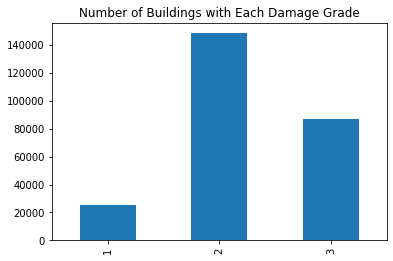

In [7]:
(df_train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

## Feature Selection/Feature Engineering

In [8]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'land_surface_condition',
                     'age',
                     'geo_level_2_id',
                     'ground_floor_type',
                     'has_secondary_use',
                     'count_families',
                     'plan_configuration',
                     'has_superstructure_timber',
                     'has_superstructure_bamboo',
                     'has_superstructure_other']

df_train_values_subset = df_train_values[selected_features]

## Transforming categorycal into numerical
Our dataframe has categorycal values as `foundation_type`so we convert them into numbers so we can compute them with the mathematical algorithms

In [9]:
df_train_values_subset['foundation_type'].replace(['h', 'i', 'r', 'u', 'w'], [0, 1, 2, 3, 4], inplace=True)
df_train_values_subset['land_surface_condition'].replace(['n', 'o', 't'], [0, 1, 2], inplace=True)
df_train_values_subset['ground_floor_type'].replace(['f', 'm', 'v', 'x', 'z'], [0, 1, 2, 3, 4], inplace=True)
df_train_values_subset['plan_configuration'].replace(['a', 'c', 'd', 'f', 'm', 'n', 'o', 'q', 's', 'u'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
df_train_values_subset

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,foundation_type,area_percentage,height_percentage,land_surface_condition,age,geo_level_2_id,ground_floor_type,has_secondary_use,count_families,plan_configuration,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_other
building_id,,,,,,,,,,,,,
802906,2,6,5,2,30,487,0,0,1,2,0,0,0
28830,2,8,7,1,10,900,3,0,1,2,0,0,0
94947,2,5,5,2,10,363,0,0,1,2,0,0,0
590882,2,6,5,2,10,418,0,0,1,2,1,1,0
201944,2,8,9,2,30,131,0,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,2,6,3,0,55,1335,0,0,1,7,0,0,0
669485,2,6,5,2,0,715,0,0,1,2,0,0,0
602512,2,6,7,2,55,51,0,0,1,2,0,0,0


## Data Pre-processing
We divide the dataframe in two halves, one to train the model and the other to test our model

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_values_subset, df_train_labels.damage_grade,
                                                random_state=1)


# Modeling


**Basics.**

1. Use NaiveBayes
2. Use knn or Decision Trees (Cross-validation)
3. Use Ensembles with hyperparameters optimization



## PREDICTION USING NAIVEBAYES

In [11]:
from sklearn.naive_bayes import ComplementNB # 1. choose model class
model = ComplementNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_model = model.predict(X_test) 

**Preevaluation**

The metric for the competitions is $F1-score$, which balances the precision and recall of a classifier. We will use a variant called the micro averaged  $F1-score$.

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, y_model, average='micro')

0.3342849687648693

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_model, labels=model.classes_))

              precision    recall  f1-score   support

           1       0.15      0.78      0.25      6238
           2       0.59      0.32      0.42     37210
           3       0.41      0.22      0.29     21703

    accuracy                           0.33     65151
   macro avg       0.38      0.44      0.32     65151
weighted avg       0.49      0.33      0.36     65151



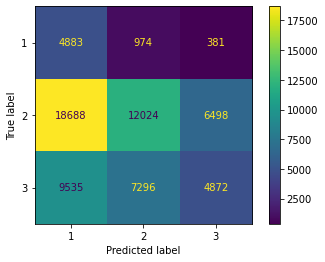

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_model, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Prepare Submission



For the **final** $F1-micro-average$, we'll be using the class predictions, not the class probabilities. 

Let's load up the data, select the subset of features we used to train the model and create dummy variables, and see what we get on the leaderboard.







In [29]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/test_values.csv
test_values = pd.read_csv('test_values.csv', index_col='building_id')
test_values_subset = test_values[selected_features]
test_values_subset['foundation_type'].replace(['h', 'i', 'r', 'u', 'w'], [0, 1, 2, 3, 4], inplace=True)
test_values_subset['land_surface_condition'].replace(['n', 'o', 't'], [0, 1, 2], inplace=True)
test_values_subset['ground_floor_type'].replace(['f', 'm', 'v', 'x', 'z'], [0, 1, 2, 3, 4], inplace=True)
test_values_subset['plan_configuration'].replace(['a', 'c', 'd', 'f', 'm', 'n', 'o', 'q', 's', 'u'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

--2022-12-13 10:41:39--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/test_values.csv
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/test_values.csv [following]
--2022-12-13 10:41:40--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/test_values.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7815385 (7.5M) [text/plain]
Saving to: ‘test_values.csv’

test_values.csv     100%[===================>]   7.45M  --.-KB/s    in 0.09s   

2022-12-13 10:41:40 (83.5 MB/s) - ‘test_values.csv’ saved [7815385/78

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


**Make Predictions**: Note that we use the class predictions, not the class probabilities.

In [67]:
predictions = model.predict(test_values_subset)

**Save Submission**

We can use the column name and index from the submission format to ensure our predictions are in the form.

In [68]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/submission_format.csv
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

--2022-12-12 11:03:40--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/submission_format.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/submission_format.csv [following]
--2022-12-12 11:03:40--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/submission_format.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 777012 (759K) [text/plain]
Saving to: ‘submission_format.csv.1’

submission_format.c 100%[===================>] 758.80K  --.-KB/s    in 0.04s   

2022-12-12 11:03:40 (16.8 MB/s) - ‘submission_

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,2


In [69]:
my_submission.to_csv('submissionNB.csv')

## PREDICTION WITH DECISION TREES

In [12]:
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

We create our tree object and create the decission with the training subset

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier().fit(X_train, y_train)

Now we can try our trained tree with a test

In [15]:
preds = dtree.predict(X_test)

Once predicted we see the results and the f1-score

In [20]:
from sklearn.metrics import classification_report
print("Metrics \n" 
      +classification_report(y_true=y_train[:len(preds)], y_pred=preds))

# Confussion Matrix
print("Confussion Matrix:\n")
matriz = pd.crosstab(y_train[:len(preds)], preds, rownames=['actual'], colnames=['preds'])
print(matriz)

print(pd.DataFrame({'Feature': selected_features ,
              'Importance': dtree.feature_importances_}),"\n")


Metrics 
              precision    recall  f1-score   support

           1       0.10      0.11      0.10      6285
           2       0.57      0.57      0.57     37085
           3       0.33      0.32      0.33     21781

    accuracy                           0.44     65151
   macro avg       0.33      0.33      0.33     65151
weighted avg       0.44      0.44      0.44     65151

Confussion Matrix:

preds      1      2      3
actual                    
1        671   3622   1992
2       3847  21220  12018
3       2277  12540   6964
                      Feature  Importance
0             foundation_type    0.056127
1             area_percentage    0.155266
2           height_percentage    0.102972
3      land_surface_condition    0.029759
4                         age    0.192915
5              geo_level_2_id    0.343878
6           ground_floor_type    0.019962
7           has_secondary_use    0.017777
8              count_families    0.041263
9          plan_configuration    0.

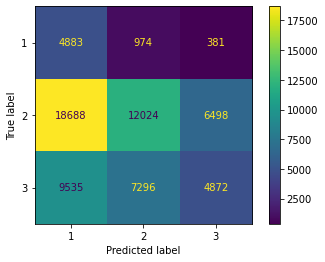

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_model, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

We can train the tree with the complete dataframe and see that the results are much better

In [33]:
x = df_train_values_subset
y = df_train_labels.damage_grade

dtree = DecisionTreeClassifier().fit(x, y)
preds = dtree.predict(x)

from sklearn.metrics import classification_report
print("Metrics \n" 
      +classification_report(y_true=y, y_pred=preds))

# Confussion Matrix
print("Confussion Matrix:\n")
matriz = pd.crosstab(y, preds, rownames=['actual'], colnames=['preds'])
print(matriz)

print(pd.DataFrame({'Feature': selected_features ,
              'Importance': dtree.feature_importances_}),"\n")

Metrics 
              precision    recall  f1-score   support

           1       0.90      0.96      0.93     25124
           2       0.93      0.97      0.95    148259
           3       0.97      0.89      0.93     87218

    accuracy                           0.94    260601
   macro avg       0.93      0.94      0.94    260601
weighted avg       0.94      0.94      0.94    260601

Confussion Matrix:

preds       1       2      3
actual                      
1       24140     927     57
2        2172  143484   2603
3         376    9493  77349
                      Feature  Importance
0             foundation_type    0.057348
1             area_percentage    0.151193
2           height_percentage    0.100651
3      land_surface_condition    0.027288
4                         age    0.186132
5              geo_level_2_id    0.356507
6           ground_floor_type    0.019792
7           has_secondary_use    0.018390
8              count_families    0.042729
9          plan_configura

We export our subset of predictions

In [38]:
preds = dtree.predict(test_values_subset)
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/submission_format.csv
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
my_submission = pd.DataFrame(data=preds,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.to_csv('submissionDT.csv')

--2022-12-13 10:54:44--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/submission_format.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/submission_format.csv [following]
--2022-12-13 10:54:44--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/submission_format.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 777012 (759K) [text/plain]
Saving to: ‘submission_format.csv.6’

submission_format.c 100%[===================>] 758.80K  --.-KB/s    in 0.04s   

2022-12-13 10:54:44 (16.7 MB/s) - ‘submission_